In [1]:
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import requests
import json

In [2]:
loaded_file = {}
with open("us-state-boundaries.json", "r") as data_file:
    loaded_file = json.load(data_file)

# States in New England

In [3]:
new_england_states_index = []
for each_index in range(len(loaded_file)):
    state_name = loaded_file[each_index]['fields']['name']
    if state_name == "Vermont" or state_name == "New Hampshire" or state_name == "Maine" or state_name == "Connecticut" or state_name == "Massachusetts":
        new_england_states_index.append(each_index)

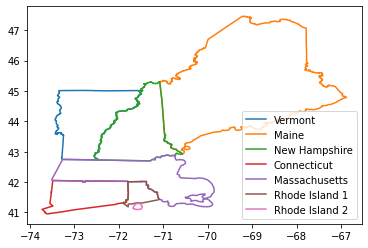

In [4]:
states_boundries = []
for each_index in new_england_states_index:
    name = loaded_file[each_index]["fields"]["name"]
    coordinates = loaded_file[each_index]["fields"]["st_asgeojson"]["coordinates"][0]
    states_boundries.append(coordinates)
    plt.plot([i[0] for i in coordinates], [i[1] for i in coordinates], label=name)

# for Rhode Island
coordinates_1 = loaded_file[19]['fields']["st_asgeojson"]["coordinates"][0][0]
coordinates_2 = loaded_file[19]['fields']["st_asgeojson"]["coordinates"][1][0]
plt.plot([i[0] for i in coordinates_1], [i[1] for i in coordinates_1], label="Rhode Island 1")
plt.plot([i[0] for i in coordinates_2], [i[1] for i in coordinates_2], label="Rhode Island 2")

plt.legend()
plt.show()

# Point in Polygon Calculation

## Vermont

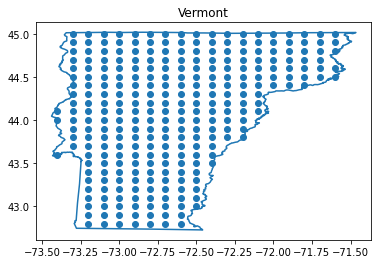

In [6]:
poly_vermont = Polygon(states_boundries[0])
point_within_vermont = []
possible_range = [(a*0.1, b*0.1) for a in range(-735, -715, 1) for b in range(420, 460, 1)]

for each_point in possible_range:
    point = Point(each_point)
    if point.within(poly_vermont):
        point_within_vermont.append(each_point)

plt.plot([i[0] for i in states_boundries[0]], [i[1] for i in states_boundries[0]])
plt.scatter([i[0] for i in point_within_vermont], [i[1] for i in point_within_vermont])
plt.title("Vermont")
plt.show()

## Maine

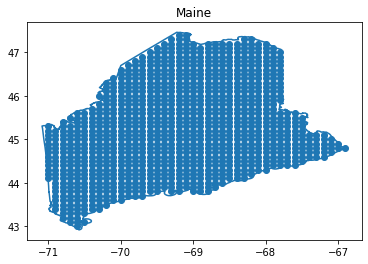

In [10]:
poly_maine = Polygon(states_boundries[1])
point_within_maine = []
possible_range = [(a*0.1, b*0.1) for a in range(-720, -660, 1) for b in range(420, 480, 1)]

for each_point in possible_range:
    point = Point(each_point)
    if point.within(poly_maine):
        point_within_maine.append(each_point)

plt.plot([i[0] for i in states_boundries[1]], [i[1] for i in states_boundries[1]])
plt.scatter([i[0] for i in point_within_maine], [i[1] for i in point_within_maine])
plt.title("Maine")
plt.show()

## New Hampshire

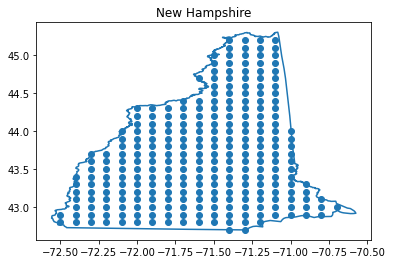

In [14]:
poly_nh = Polygon(states_boundries[2])
point_within_nh = []
possible_range = [(a*0.1, b*0.1) for a in range(-730, -700, 1) for b in range(420, 460, 1)]

for each_point in possible_range:
    point = Point(each_point)
    if point.within(poly_nh):
        point_within_nh.append(each_point)

plt.plot([i[0] for i in states_boundries[2]], [i[1] for i in states_boundries[2]])
plt.scatter([i[0] for i in point_within_nh], [i[1] for i in point_within_nh])
plt.title("New Hampshire")
plt.show()

## Connecticut

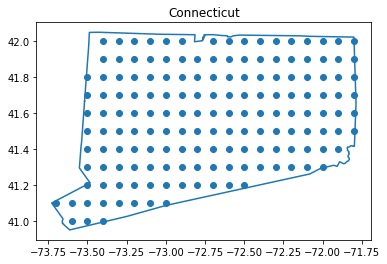

In [16]:
poly_ct = Polygon(states_boundries[3])
point_within_ct = []
possible_range = [(a*0.1, b*0.1) for a in range(-740, -710, 1) for b in range(400, 430, 1)]

for each_point in possible_range:
    point = Point(each_point)
    if point.within(poly_ct):
        point_within_ct.append(each_point)

plt.plot([i[0] for i in states_boundries[3]], [i[1] for i in states_boundries[3]])
plt.scatter([i[0] for i in point_within_ct], [i[1] for i in point_within_ct])
plt.title("Connecticut")
plt.show()

## Massachusetts

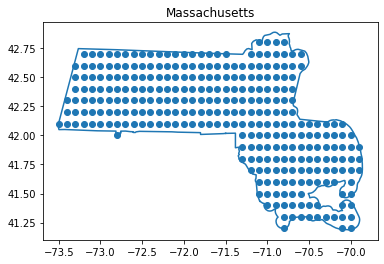

In [19]:
poly_ma = Polygon(states_boundries[4])
point_within_ma = []
possible_range = [(a*0.1, b*0.1) for a in range(-740, -690, 1) for b in range(400, 430, 1)]

for each_point in possible_range:
    point = Point(each_point)
    if point.within(poly_ma):
        point_within_ma.append(each_point)

plt.plot([i[0] for i in states_boundries[4]], [i[1] for i in states_boundries[4]])
plt.scatter([i[0] for i in point_within_ma], [i[1] for i in point_within_ma])
plt.title("Massachusetts")
plt.show()

## Rhode Island

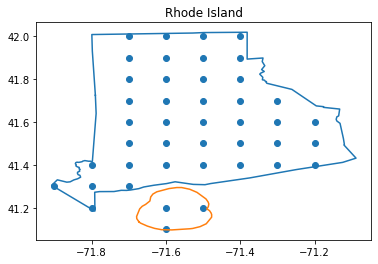

In [27]:
ri_1 = coordinates_1
ri_2 = coordinates_2

poly_ri_1 = Polygon(ri_1)
poly_ri_2 = Polygon(ri_2)

points_within_ri = []

possible_range = [(a*0.1, b*0.1) for a in range(-720, -700, 1) for b in range(410, 430, 1)]

for each_point in possible_range:
    point = Point(each_point)
    if point.within(poly_ri_1) or point.within(poly_ri_2):
        points_within_ri.append(each_point)

plt.plot([i[0] for i in ri_1], [i[1] for i in ri_1])
plt.plot([i[0] for i in ri_2], [i[1] for i in ri_2])
plt.scatter([i[0] for i in points_within_ri], [i[1] for i in points_within_ri])
plt.title("Rhode Island")
plt.show()

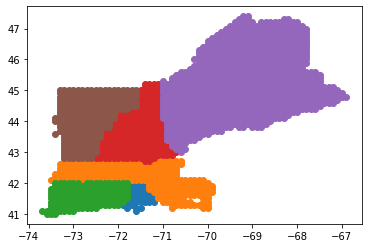

In [28]:
plt.scatter([i[0] for i in points_within_ri], [i[1] for i in points_within_ri])
plt.scatter([i[0] for i in point_within_ma], [i[1] for i in point_within_ma])
plt.scatter([i[0] for i in point_within_ct], [i[1] for i in point_within_ct])
plt.scatter([i[0] for i in point_within_nh], [i[1] for i in point_within_nh])
plt.scatter([i[0] for i in point_within_maine], [i[1] for i in point_within_maine])
plt.scatter([i[0] for i in point_within_vermont], [i[1] for i in point_within_vermont])
plt.show()

In [29]:
result_data = {
    "ri": points_within_ri,
    "ma": point_within_ma,
    "ct": point_within_ct,
    "nh": point_within_nh,
    "me": point_within_maine,
    "vt": point_within_vermont
}

with open("weather_zones.json", "w") as data_file:
    json.dump(result_data, data_file)